## 🔄 Ajustes_con_log.ipynb

**Autor:** Johanna Atenea Carreon Baltazar  
**Contacto:** johannaatenea13@gmail.com  
**Fecha de última modificación:** junio de 2025

---

### 🎯 Objetivo

Aplicar transformaciones logarítmicas a los datos de **distancias entre genes duplicados** para reducir su sesgo positivo y facilitar el ajuste a distribuciones estadísticas más normales o simétricas.  
Posteriormente, se identifican **distribuciones óptimas** que ajusten los datos transformados y se procede a **retransformar (deshacer la transformación logarítmica)** para evaluar si estas nuevas distribuciones también describen adecuadamente los datos originales.

---

### 🧪 Proceso general

1. **Transformación logarítmica**:  
   Se aplica $\log(x)$ a los datos, lo cual permite suavizar la cola derecha de la distribución y hacerla más simétrica.

3. **Ajuste de modelos estadísticos** sobre los datos transformados:  
   Se evalúan múltiples distribuciones, incluyendo la **Johnson SU**, que permite un alto grado de flexibilidad para representar datos sesgados o con curtosis.

4. **Evaluación de ajuste**:  
   Se emplea el **test de Kolmogorov-Smirnov (KS)** para evaluar qué distribución se ajusta mejor a los datos transformados.

5. **Retransformación (inversa del log)**:  
   Los modelos ajustados se invierten matemáticamente para proponer distribuciones que describan los datos originales (sin transformación log), pero con parámetros derivados del modelo sobre la transformación.

6. **Visualización y comparación**:  
   Se generan histogramas, QQ-plots y comparaciones gráficas para ilustrar la calidad del ajuste antes y después de la transformación.

---

### 📥 Entradas requeridas

- Archivos `.pkl` generados previamente en:
  - `Diferencias_entre_duplicados_en_pb.ipynb`
  - `Diferencias_entre_duplicados_en_num_genes.ipynb`

  Específicamente, los archivos contienen distancias entre genes duplicados clasificadas por método (K-means / umbrales) y medida (kb / número de genes).

---

### 📤 Salidas generadas

- Histogramas comparativos antes y después del ajuste logarítmico.
- Distribuciones ajustadas (por ejemplo, Johnson SU) que mejor modelan los datos.
- Resultados de pruebas estadísticas (KS p-values) que cuantifican la calidad del ajuste.
- Comparación de distribuciones antes y después de la retransfomación.

---

### 🧰 Librerías requeridas

```python
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import johnsonsu, kstest


In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
# Cargar el archivo .pkl
with open('resultados_en_pb_k_means.pkl', 'rb') as file:
 resultados_diferencias_k_means= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_k_means)  # Muestra una parte del contenido

{103690.82: [27.955, 492.574, 149.758, 242.835, 112.269, 18.475, 13.226, 159.211, 292.866, 49.606, 230.723, 150.844, 264.411, 301.786, 34.597, 130.045, 216.455, 180.321, 0.024, 1492.116, 14.825, 0.701, 296.858, 260.885, 128.426, 330.112, 0.619, 32.343, 729.804], 1472755.9: [359.549, 463.285, 45.696, 2.701, 243.312, 191.922, 268.811, 135.853, 272.953, 318.956, 769.342, 221.987, 83.298, 225.854, 452.11, 345.746, 0.397, 381.058, 589.569, 278.154, 145.539, 535.972, 400.784, 211.093, 331.648, 20.738, 9.871, 35.422, 165.268, 168.081], 1618022.9: [593.324, 372.309, 291.381, 539.154, 6.127, 0.791, 260.413, 70.723, 133.842, 992.659, 23.359, 7.17, 294.066, 338.139, 526.39, 543.869, 253.545, 0.511, 223.998, 532.004, 59.144, 40.601, 92.732, 52.284, 308.467, 455.155], 1647413.14: [26.995, 19.623, 132.43, 21.7, 225.579, 89.507, 210.768, 39.133, 227.249, 84.327, 0.079, 1022.45, 222.277, 502.796, 155.831, 110.864, 30.913, 52.634, 0.053, 294.353, 793.698, 583.782, 360.506, 0.161, 449.316], 1869241.2: [

In [4]:
# Cargar el archivo .pkl
with open('resultados_en_pb_umbrales.pkl', 'rb') as file:
 resultados_diferencias_umbrales= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_umbrales)  # Muestra una parte del contenido

{103690.82: [89.533, 0.2, 208.644, 108.74, 196.619, 27.955, 492.574, 149.758, 242.835, 112.269, 18.475, 13.226, 159.211, 292.866, 27.119, 20.781, 230.723, 150.844, 264.411, 79.48, 220.627, 34.597, 45.32, 83.058, 131.832, 82.416, 180.321, 0.024, 2.508, 81.041, 486.333, 98.59, 504.895, 77.727, 227.405, 14.825, 0.701, 296.858, 58.118, 200.797, 46.068, 80.79, 87.291, 27.692, 10.869, 183.562, 49.153, 116.26], 1472755.9: [335.328, 97.888, 388.224, 45.696, 2.701, 243.312, 6.6, 183.094, 25.736, 110.02, 127.24, 71.173, 28.039, 33.313, 138.782, 0.166, 69.417, 59.041, 315.897, 117.872, 19.129, 486.946, 34.609, 80.359, 333.404, 225.854, 452.11, 345.746, 383.371, 83.416, 253.101, 13.63, 233.428, 73.801, 202.698, 145.539, 332.447, 201.309, 163.825, 77.253, 156.381, 7.296, 202.196, 331.648, 20.738, 9.871, 35.422, 165.268, 13.13, 152.636], 1618022.9: [217.387, 173.778, 107.559, 69.566, 22.752, 276.738, 291.381, 238.165, 296.308, 0.987, 6.127, 0.791, 61.998, 12.595, 182.354, 70.723, 889.946, 233.131, 2

In [5]:
# Cargar el archivo .pkl
with open('resultados_en_numero_genes_k_means.pkl', 'rb') as file:
 resultados_diferencias_num_genes_k_means= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_num_genes_k_means)  # Muestra una parte del contenido

{2490939.1: [4, 1, 12, 169, 105, 385, 315, 186, 71, 440, 3, 185, 6, 461, 132, 163, 69, 326, 32, 214, 123, 73, 1, 177, 339, 198, 81, 26, 326, 222, 13, 333, 212, 2, 237, 238, 34, 496], 103690.82: [28, 455, 138, 226, 119, 24, 17, 137, 255, 41, 210, 145, 228, 248, 20, 125, 205, 182, 1, 1386, 12, 3, 291, 231, 123, 288, 2, 30, 684], 211165.2: [78, 89, 73, 215, 14, 453, 114, 101, 2, 231, 194, 41, 405, 30, 1, 51, 64, 26, 432, 123, 258, 34, 113, 131, 2, 214, 106, 13, 18, 130, 18, 175, 56, 114, 50, 29, 93, 68, 144, 101, 3, 57, 177, 165, 302, 707, 142, 4, 13, 53, 18, 1, 39, 125, 40, 206, 14, 101, 241, 322], 1472755.9: [342, 438, 47, 6, 261, 164, 277, 116, 266, 252, 774, 219, 84, 227, 442, 340, 2, 418, 564, 285, 135, 525, 402, 152, 264, 24, 8, 38, 147, 180], 2576904.6: [819, 66, 123, 565, 2, 53, 204, 220, 224, 94, 3, 41, 21, 1, 182, 11, 71, 1688, 462, 5, 5, 10, 217, 220, 104, 132, 39, 157, 156, 427, 111], 2764711.14: [6, 3, 27, 52, 164, 277, 1, 15, 270, 370, 230, 34, 51, 479, 63, 87, 320, 58, 109,

In [26]:
# Cargar el archivo .pkl
with open('resultados_en_numero_genes_umbrales.pkl', 'rb') as file:
 resultados_diferencias_num_genes_umbrales= pickle.load(file)

# Verificar el contenido
#print(type(genes_copia))  # Para saber qué tipo de objeto es
print(resultados_diferencias_num_genes_umbrales)  # Muestra una parte del contenido

{2490939.1: [69, 4, 1, 12, 44, 125, 22, 83, 287, 98, 113, 128, 260, 71, 32, 408, 139, 42, 8, 5, 461, 104, 118, 73, 69, 326, 32, 79, 194, 45, 19, 73, 1, 3, 174, 339, 198, 81, 26, 326, 123, 87, 12, 11, 2, 206, 137, 60, 142, 2, 237, 192, 46, 34, 52, 1, 65, 309], 103690.82: [91, 1, 188, 91, 196, 28, 455, 138, 226, 119, 24, 17, 137, 255, 22, 19, 210, 145, 228, 78, 170, 20, 46, 79, 114, 91, 182, 1, 3, 80, 446, 88, 478, 82, 209, 12, 3, 291, 59, 172, 43, 80, 64, 32, 8, 172, 44, 117], 211165.2: [59, 70, 36, 53, 73, 71, 146, 12, 127, 326, 52, 62, 101, 2, 425, 41, 239, 197, 141, 30, 103, 299, 123, 258, 34, 53, 23, 37, 131, 2, 320, 12, 19, 130, 1, 17, 175, 170, 79, 81, 12, 68, 144, 101, 60, 63, 114, 165, 75, 59, 168, 60, 461, 56, 130, 64, 78, 4, 13, 111, 100, 25, 40, 36, 170, 14, 40, 39, 1, 21, 241, 271], 1472755.9: [320, 96, 364, 47, 6, 261, 6, 158, 15, 133, 129, 70, 23, 23, 137, 1, 77, 51, 249, 106, 24, 507, 39, 74, 330, 227, 442, 340, 420, 98, 216, 14, 236, 65, 220, 135, 329, 196, 173, 79, 150,

## Histogramas con ajuste de datos con log

### K-Means pb

Lambda óptimo para Box-Cox: 0.29561582781993617


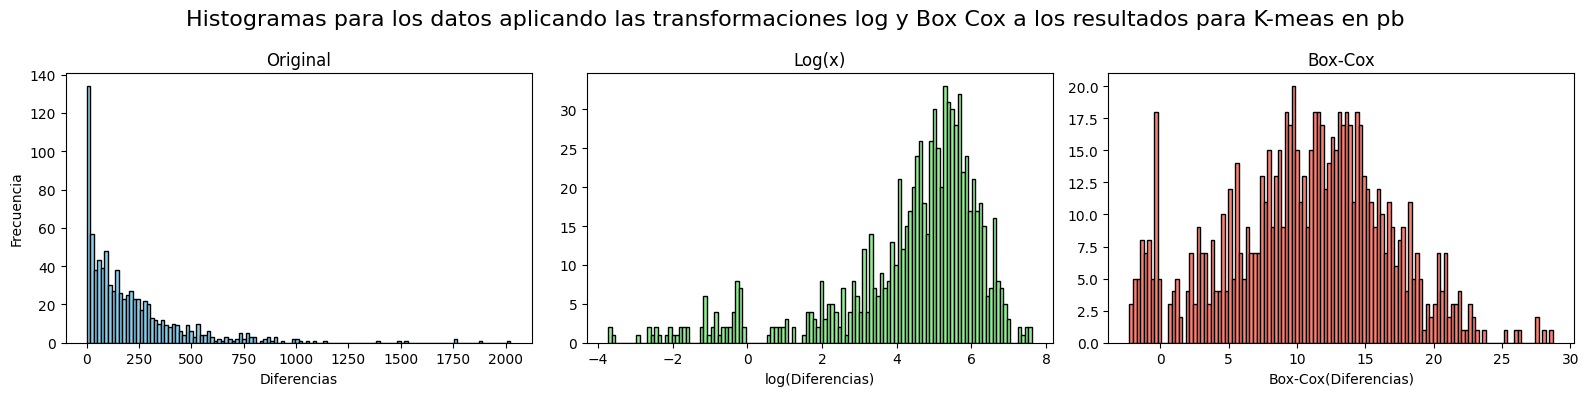

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Crear una lista con todas las diferencias
diferencias = [d for diferencias_genoma in resultados_diferencias_k_means.values() for d in diferencias_genoma]

# 2. Convertir a array de NumPy
diferencias = np.array(diferencias)

# 3. Filtrar solo valores positivos
diferencias = diferencias[diferencias > 0]

# 4. Aplicar transformación log
log_diferencias = np.log(diferencias)

# 5. Aplicar transformación de Box-Cox
boxcox_diferencias, lambda_optimo = stats.boxcox(diferencias)

print(f"Lambda óptimo para Box-Cox: {lambda_optimo}")
# 6. Histograma original
plt.figure(figsize=(16, 4))
plt.suptitle("Histogramas para los datos aplicando las transformaciones log y Box Cox a los resultados para K-meas en pb", fontsize=16)
plt.subplot(1, 3, 1)
plt.hist(diferencias, bins=120, color='skyblue', edgecolor='black')
plt.title("Original")
plt.xlabel("Diferencias")
plt.ylabel("Frecuencia")

# 7. Histograma log-transformado
plt.subplot(1, 3, 2)
plt.hist(log_diferencias, bins=120, color='lightgreen', edgecolor='black')
plt.title("Log(x)")
plt.xlabel("log(Diferencias)")

# 8. Histograma Box-Cox transformado
plt.subplot(1, 3, 3)
plt.hist(boxcox_diferencias, bins=120, color='salmon', edgecolor='black')
plt.title("Box-Cox")
plt.xlabel("Box-Cox(Diferencias)")

plt.tight_layout()
plt.savefig("resultados/histograma_log_pb_k_means.png", dpi =200)
plt.show()


## Ajustes para log(diferencias)

/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Resultados filtrados y ordenados por AIC (p-valor KS > 0.05):

Distribución: johnsonsu
  AIC: 3226.91
  KS D: 0.0340
  KS p-valor: 0.2722


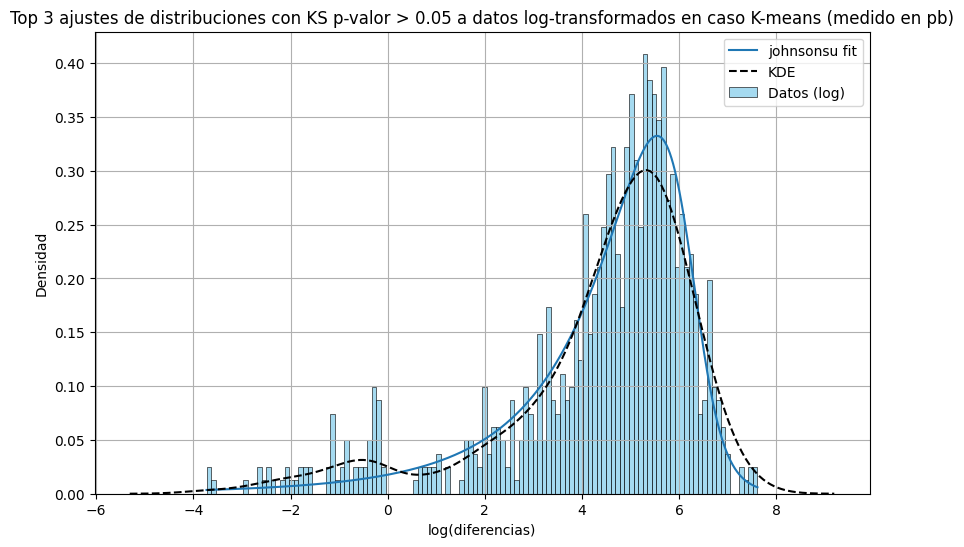

In [36]:
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Si no están definidos:
log_diffs = np.log(diferencias)

# Lista extendida de distribuciones
distribuciones = {
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'norm': stats.norm,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Almacenar resultados
resultados = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(log_diffs)
        log_likelihood = np.sum(dist.logpdf(log_diffs, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(log_diffs, dist.name, args=params)

        resultados[nombre] = {
            'params': params,
            'AIC': AIC,
            'KS D': D,
            'KS p-value': p_ks
        }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Filtrar solo distribuciones con KS p-value > 0.05
resultados_filtrados = {k: v for k, v in resultados.items() if v['KS p-value'] > 0.05}

# Mostrar resultados ordenados por AIC (solo filtrados)
print("Resultados filtrados y ordenados por AIC (p-valor KS > 0.05):")
for nombre in sorted(resultados_filtrados, key=lambda x: resultados_filtrados[x]['AIC']):
    res = resultados_filtrados[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  AIC: {res['AIC']:.2f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")

# Graficar mejores distribuciones (top 3 por AIC) solo filtradas
plt.figure(figsize=(10, 6))
sns.histplot(log_diffs, bins=120, kde=False, stat='density', color='skyblue', label='Datos (log)', edgecolor='black')
x_vals = np.linspace(min(log_diffs), max(log_diffs), 1000)

top3 = sorted(resultados_filtrados, key=lambda x: resultados_filtrados[x]['AIC'])[:3]
for nombre in top3:
    dist = distribuciones[nombre]
    params = resultados_filtrados[nombre]['params']
    plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

# KDE para comparación
sns.kdeplot(log_diffs, color='black', linestyle='--', label='KDE')

plt.title("Top 3 ajustes de distribuciones con KS p-valor > 0.05 a datos log-transformados en caso K-means (medido en pb)")
plt.xlabel("log(diferencias)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.savefig("resultados/ajuste_datos_con_log_pb_k_means.png",dpi = 150)
plt.show()


### Ajustes para box cox

Lambda óptimo de Box-Cox: 0.2956


/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)



Distribuciones con p-valor KS > 0.05, ordenadas por p-value:

Distribución: gamma
  AIC: 5475.48
  KS D: 0.0443
  KS p-valor: 0.0680

Distribución: lognorm
  AIC: 5472.46
  KS D: 0.0411
  KS p-valor: 0.1082

Distribución: weibull
  AIC: 5459.30
  KS D: 0.0403
  KS p-valor: 0.1216

Distribución: norm
  AIC: 5469.50
  KS D: 0.0401
  KS p-valor: 0.1246

Distribución: beta
  AIC: 5469.39
  KS D: 0.0382
  KS p-valor: 0.1606

Distribución: loggamma
  AIC: 5468.67
  KS D: 0.0360
  KS p-valor: 0.2144

Distribución: johnsonsu
  AIC: 5470.69
  KS D: 0.0359
  KS p-valor: 0.2156


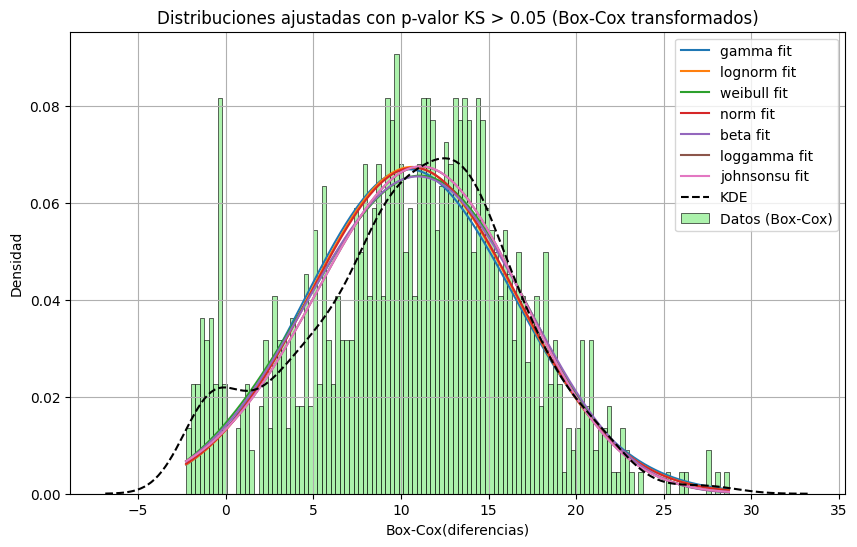

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Transformación Box-Cox
boxcox_diffs, lambda_opt = stats.boxcox(diferencias)
print(f"Lambda óptimo de Box-Cox: {lambda_opt:.4f}")

# Distribuciones a evaluar
distribuciones = {
    'norm': stats.norm,
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Ajuste y evaluación
resultados = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(boxcox_diffs)
        log_likelihood = np.sum(dist.logpdf(boxcox_diffs, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(boxcox_diffs, dist.name, args=params)

        resultados[nombre] = {
            'params': params,
            'AIC': AIC,
            'KS D': D,
            'KS p-value': p_ks
        }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Filtrar por p-valor de KS > 0.05
resultados_filtrados = {k: v for k, v in resultados.items() if v['KS p-value'] > 0.05}

# Mostrar resultados
print("\nDistribuciones con p-valor KS > 0.05, ordenadas por p-value:")
for nombre in sorted(resultados_filtrados, key=lambda x: resultados_filtrados[x]['KS p-value']):
    res = resultados_filtrados[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  AIC: {res['AIC']:.2f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")

# Graficar TODAS las distribuciones que pasaron el filtro
plt.figure(figsize=(10, 6))
sns.histplot(boxcox_diffs, bins=120, kde=False, stat='density', color='lightgreen', label='Datos (Box-Cox)', edgecolor='black')
x_vals = np.linspace(min(boxcox_diffs), max(boxcox_diffs), 1000)

for nombre in sorted(resultados_filtrados, key=lambda x: resultados_filtrados[x]['KS p-value']):
    dist = distribuciones[nombre]
    params = resultados_filtrados[nombre]['params']
    plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

# KDE para comparación
sns.kdeplot(boxcox_diffs, color='black', linestyle='--', label='KDE')

plt.title("Distribuciones ajustadas con p-valor KS > 0.05 (Box-Cox transformados)")
plt.xlabel("Box-Cox(diferencias)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


### QQ plot para log(diferencias)

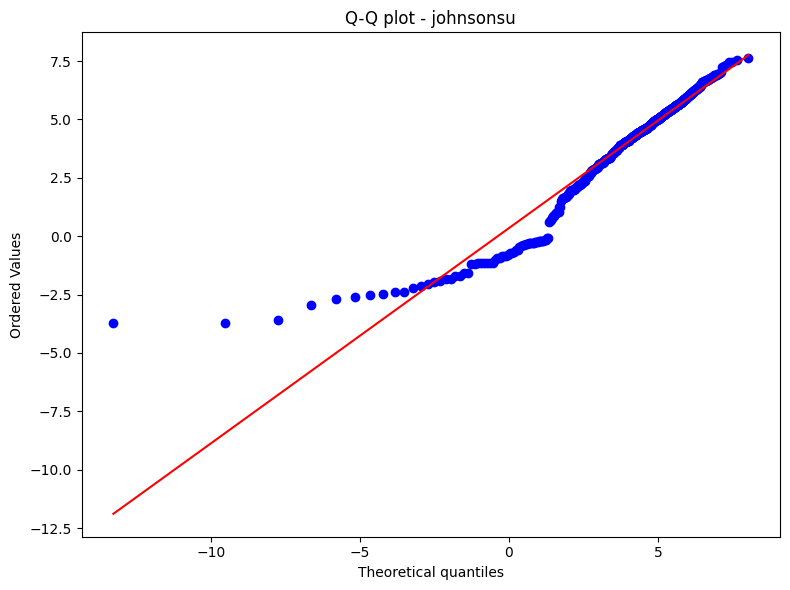

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustar distribución johnsonsu
params_johnsonsu = stats.johnsonsu.fit(log_diffs)

# Crear Q-Q plot para johnsonsu
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(log_diffs, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=ax)
ax.set_title("Q-Q plot - johnsonsu")

plt.tight_layout()
plt.show()


### QQ plot para box cox diferencias

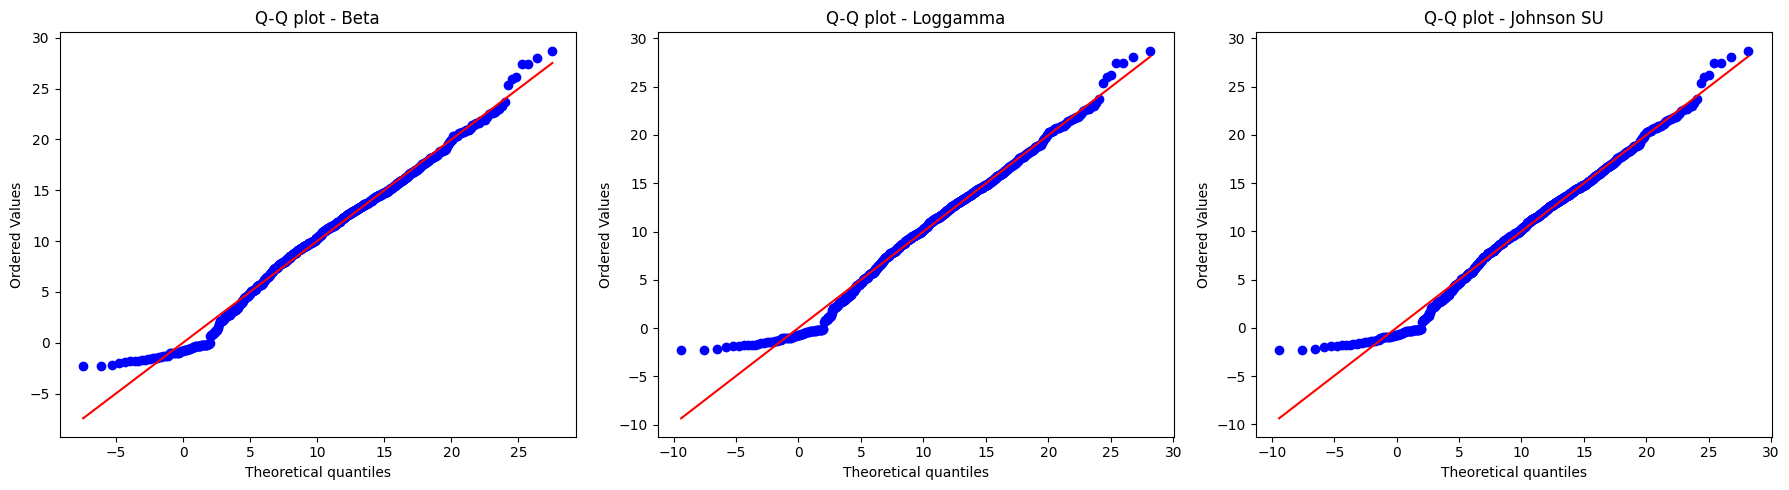

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

# Suponiendo que ya tienes boxcox_diffs calculado:
# boxcox_diffs, lambda_opt = stats.boxcox(diferencias)

# Ajustar distribuciones
params_beta = stats.beta.fit(boxcox_diffs)
params_loggamma = stats.loggamma.fit(boxcox_diffs)
params_johnsonsu = stats.johnsonsu.fit(boxcox_diffs)

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Q-Q plot para Beta
stats.probplot(boxcox_diffs, dist=stats.beta, sparams=params_beta, plot=axes[0])
axes[0].set_title("Q-Q plot - Beta")

# Q-Q plot para Loggamma
stats.probplot(boxcox_diffs, dist=stats.loggamma, sparams=params_loggamma, plot=axes[1])
axes[1].set_title("Q-Q plot - Loggamma")

# Q-Q plot para Johnson SU
stats.probplot(boxcox_diffs, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=axes[2])
axes[2].set_title("Q-Q plot - Johnson SU")

plt.tight_layout()
plt.show()



In [13]:
print("Parámetros Loggamma:", params_loggamma)
print("Parámetros beta:", params_beta)
print("Parámetros Johnson SU:", params_johnsonsu)

Parámetros Loggamma: (45.259957388181974, -140.28767588546484, 39.720731959838616)
Parámetros beta: (14.254087438454944, 11.648623075635918, -23.330888792045734, 61.84424067063151)
Parámetros Johnson SU: (13.866744088310725, 14.753442715937304, 75.04301102046179, 59.19222268916141)


### Obtener distribuciones originales

Párametros Johnson su: (1.9135783376142892, 1.4597208384206013, 6.295801042716719, 0.9892986816535705)
AIC: 14630.67752929153
KS Statistic: 0.021885218946132698
KS p-value: 0.5888586172428685


/tmp/ipykernel_6594/1017056562.py:11: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_6594/1017056562.py:12: RuntimeWarning: invalid value encountered in divide
  return johnsonsu.pdf(y, *params) / x


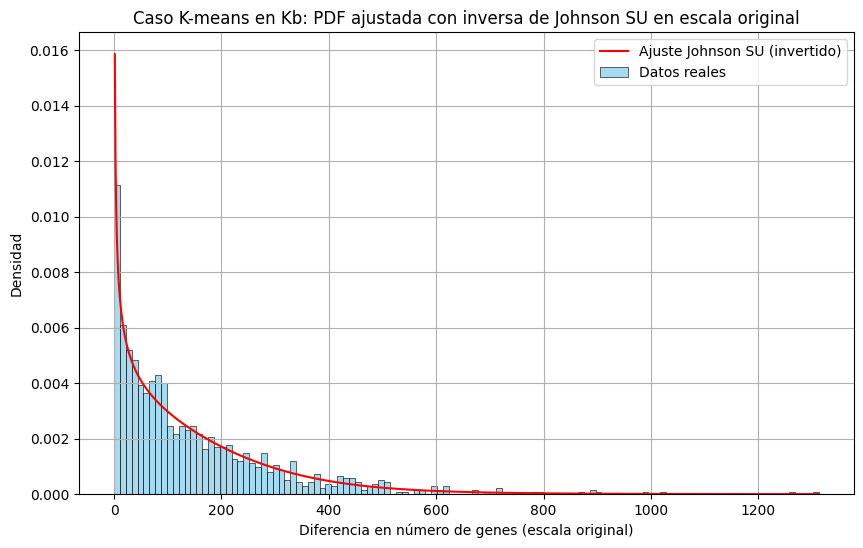

In [40]:
from scipy.stats import johnsonsu, kstest

# 1. Transformación de los datos
log_diffs = np.log(diferencias)

# 2. Ajuste de la distribución Johnson SU en escala logarítmica
params = johnsonsu.fit(log_diffs)
print('Párametros Johnson su:', params)
# 3. PDF y CDF en escala original (invirtiendo log1p)
def pdf_original(x):
    y = np.log(x)
    return johnsonsu.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return johnsonsu.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Johnson SU (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Caso K-means en Kb: PDF ajustada con inversa de Johnson SU en escala original')
plt.legend()
plt.grid(True)
plt.savefig('resultados/ajuste_JS_original_k_meas_pb.png',dpi=150)
plt.show()


## Obtener distribuciones originales para box cox

## Ajuste para log en el caso de umbrales usando pb

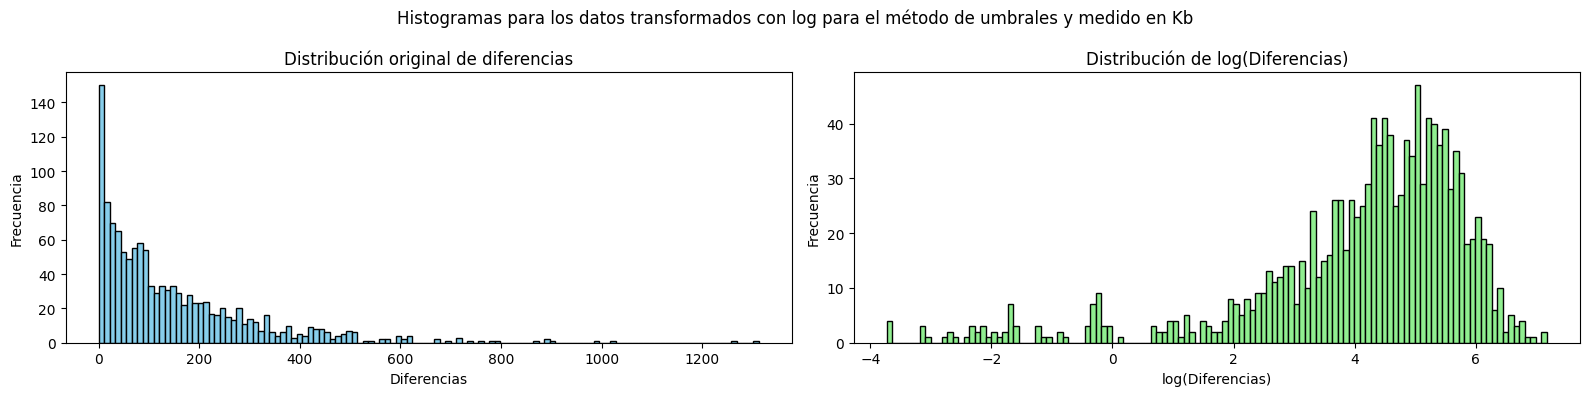

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Crear una lista con todas las diferencias desde un diccionario
diferencias_pb_umbrales = [d for diferencias_genoma in resultados_diferencias_umbrales.values() for d in diferencias_genoma]

# 2. Convertir a array de NumPy
diferencias = np.array(diferencias_pb_umbrales)

# 3. Filtrar solo valores positivos
diferencias_positivas = diferencias[diferencias > 0]

# 4. Aplicar transformación logarítmica
log_diferencias_umbrales = np.log(diferencias_positivas)

# 5. Graficar histogramas
plt.figure(figsize=(16, 4))
plt.suptitle('Histogramas para los datos transformados con log para el método de umbrales y medido en Kb')
# Histograma original
plt.subplot(1, 2, 1)
plt.hist(diferencias, bins=120, color='skyblue', edgecolor='black')
plt.title("Distribución original de diferencias")
plt.xlabel("Diferencias")
plt.ylabel("Frecuencia")

# Histograma transformado con log(x)
plt.subplot(1, 2, 2)
plt.hist(log_diferencias_umbrales, bins=120, color='lightgreen', edgecolor='black')
plt.title("Distribución de log(Diferencias)")
plt.xlabel("log(Diferencias)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.savefig('resultados/histogramas_con_log_umbrales_pb.png',dpi=150)
plt.show()



/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Resultados con KS p-valor > 0.05:

Distribución: johnsonsu
  AIC: 4417.77
  KS D: 0.0219
  KS p-valor: 0.5889

Distribución: gengamma
  AIC: 4431.41
  KS D: 0.0312
  KS p-valor: 0.1767

Distribución: loggamma
  AIC: 4429.08
  KS D: 0.0320
  KS p-valor: 0.1564


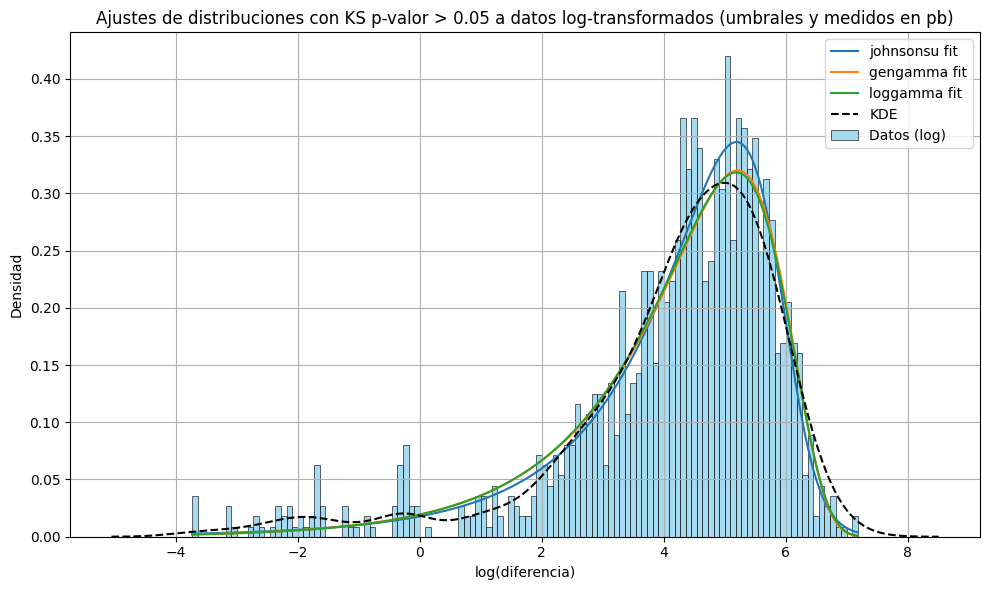

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Suponiendo que ya tienes definida la variable: diferencias_pb_umbrales
log_diffs_pb_umbrales = np.log(diferencias_pb_umbrales)

# Diccionario de distribuciones
distribuciones = {
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'norm': stats.norm,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Almacenar resultados
resultados_pb_umbrales = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(log_diffs_pb_umbrales)
        log_likelihood = np.sum(dist.logpdf(log_diffs_pb_umbrales, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(log_diffs_pb_umbrales, dist.name, args=params)

        # Guardar solo si el p-valor es mayor a 0.05
        if p_ks > 0.05:
            resultados_pb_umbrales[nombre] = {
                'params': params,
                'AIC': AIC,
                'KS D': D,
                'KS p-value': p_ks
            }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Mostrar solo resultados con p-valor > 0.05, ordenados por p-valor descendente
print("Resultados con KS p-valor > 0.05:")
for nombre in sorted(resultados_pb_umbrales, key=lambda x: resultados_pb_umbrales[x]['KS p-value'], reverse=True):
    res = resultados_pb_umbrales[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  AIC: {res['AIC']:.2f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")

# Preparar figura
plt.figure(figsize=(10, 6))
sns.histplot(log_diffs_pb_umbrales, bins=120, kde=False, stat='density',
             color='skyblue', label='Datos (log)', edgecolor='black')

# Eje X para las curvas de densidad
x_vals = np.linspace(min(log_diffs_pb_umbrales), max(log_diffs_pb_umbrales), 1000)

# Graficar solo distribuciones válidas
for nombre in sorted(resultados_pb_umbrales, key=lambda x: resultados_pb_umbrales[x]['KS p-value'], reverse=True):
    dist = distribuciones[nombre]
    params = resultados_pb_umbrales[nombre]['params']
    plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

# KDE para comparación
sns.kdeplot(log_diffs_pb_umbrales, color='black', linestyle='--', label='KDE')

# Estética del gráfico
plt.title("Ajustes de distribuciones con KS p-valor > 0.05 a datos log-transformados (umbrales y medidos en pb)")
plt.xlabel("log(diferencia)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('resultados/ajuste_datos_log_umbrales_pb.png',dpi=150)
plt.show()


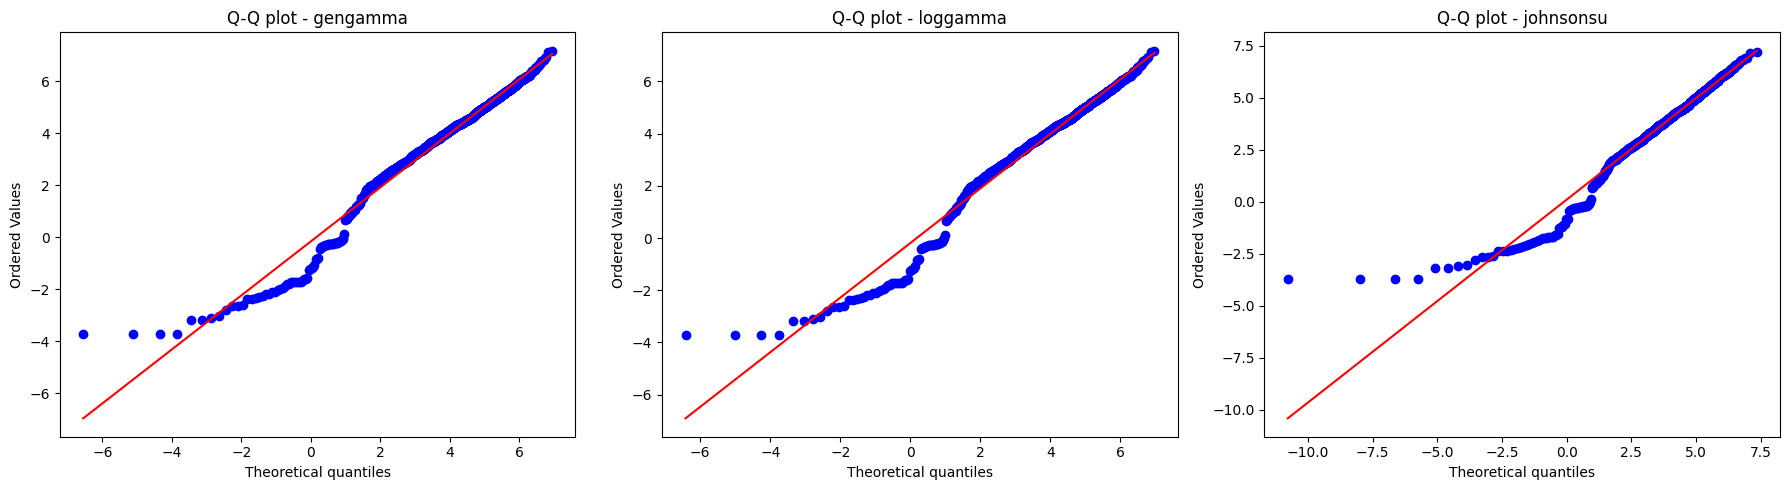

In [17]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustamos las tres distribuciones
params_loggamma = stats.loggamma.fit(log_diffs_pb_umbrales)
params_gengamma = stats.gengamma.fit(log_diffs_pb_umbrales)
params_johnsonsu = stats.johnsonsu.fit(log_diffs_pb_umbrales)

# Crear Q-Q plots para las tres distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# weibull
stats.probplot(log_diffs_pb_umbrales, dist=stats.gengamma, sparams=params_gengamma, plot=axes[0])
axes[0].set_title("Q-Q plot - gengamma")

# loggamma
stats.probplot(log_diffs_pb_umbrales, dist=stats.loggamma, sparams=params_loggamma, plot=axes[1])
axes[1].set_title("Q-Q plot - loggamma")

# johnsonsu
stats.probplot(log_diffs_pb_umbrales, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=axes[2])
axes[2].set_title("Q-Q plot - johnsonsu")

plt.tight_layout()
plt.show()

## obtener distribuciones originales

Párametros Johnson su: (1.9135783376142892, 1.4597208384206013, 6.295801042716719, 0.9892986816535705)
AIC: 14630.67752929153
KS Statistic: 0.021885218946132698
KS p-value: 0.5888586172428685


/tmp/ipykernel_6594/4284133412.py:14: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_6594/4284133412.py:15: RuntimeWarning: invalid value encountered in divide
  return johnsonsu.pdf(y, *params) / x


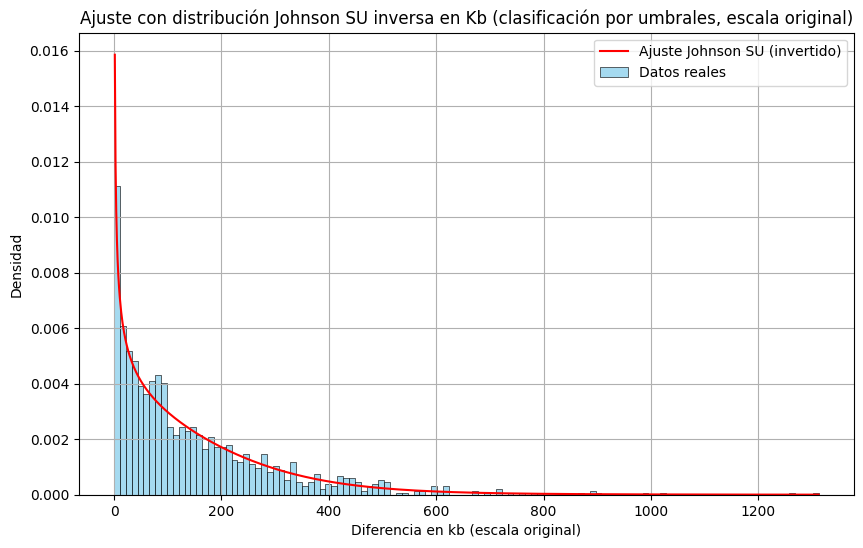

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import johnsonsu, kstest

# 1. Transformación de los datos (ya se supone que está hecho)
log_diffs_umbrales = np.log(diferencias_pb_umbrales)  # Si aún no está definido

# 2. Ajuste de johnsonsu en escala logarítmica
params = johnsonsu.fit(log_diffs_umbrales)
print('Párametros Johnson su:', params)
# 3. PDF y CDF en escala original (invirtiendo log1p)
def pdf_original(x):
    y = np.log(x)
    return johnsonsu.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return johnsonsu.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias_pb_umbrales))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias_pb_umbrales, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias_pb_umbrales), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_pb_umbrales, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Johnson SU (invertido)')
plt.xlabel('Diferencia en kb (escala original)')
plt.ylabel('Densidad')
plt.title('Ajuste con distribución Johnson SU inversa en Kb (clasificación por umbrales, escala original)')
plt.legend()
plt.grid(True)
plt.savefig('resultados/ajuste_JS_original_umbrales_pb.png',dpi=150)
plt.show()


Parámetros Generalized Gamma: (0.4079402583243239, 492569.5834212769, -326624.8374727998, 326630.64289296826)
AIC: 14644.322372250208
KS Statistic: 0.031240549047599264
KS p-value: 0.17670839844883046


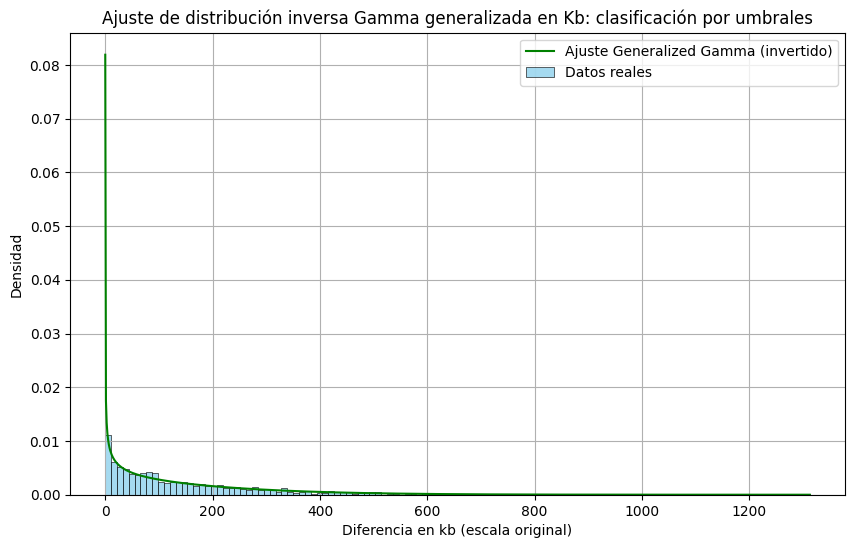

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gengamma, kstest

# Asegúrate de que no hay ceros o negativos (requerido por log)
diferencias_pb_umbrales = np.array(diferencias_pb_umbrales)
diferencias_pb_umbrales = diferencias_pb_umbrales[diferencias_pb_umbrales > 0]

# 1. Transformación logarítmica de los datos
log_diffs_umbrales = np.log(diferencias_pb_umbrales)

# 2. Ajuste de la distribución Generalized Gamma
params = gengamma.fit(log_diffs_umbrales)
print('Parámetros Generalized Gamma:', params)

# 3. PDF y CDF en escala original
def pdf_original(x):
    y = np.log(x)
    return gengamma.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return gengamma.cdf(y, *params)

# 4. AIC
log_probs = np.log(pdf_original(diferencias_pb_umbrales))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS
ks_stat, ks_p_value = kstest(diferencias_pb_umbrales, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(np.min(diferencias_pb_umbrales), np.max(diferencias_pb_umbrales), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_pb_umbrales, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='green', label='Ajuste Generalized Gamma (invertido)')
plt.xlabel('Diferencia en kb (escala original)')
plt.ylabel('Densidad')
plt.title('Ajuste de distribución inversa Gamma generalizada en Kb: clasificación por umbrales')
plt.legend()
plt.grid(True)
plt.savefig('resultados/ajuste_generalized_gamma_original_k_meas_pb.png',dpi=150)
plt.show()

# Ajustes usando números de genes y la funcion log

### k means numero de genes

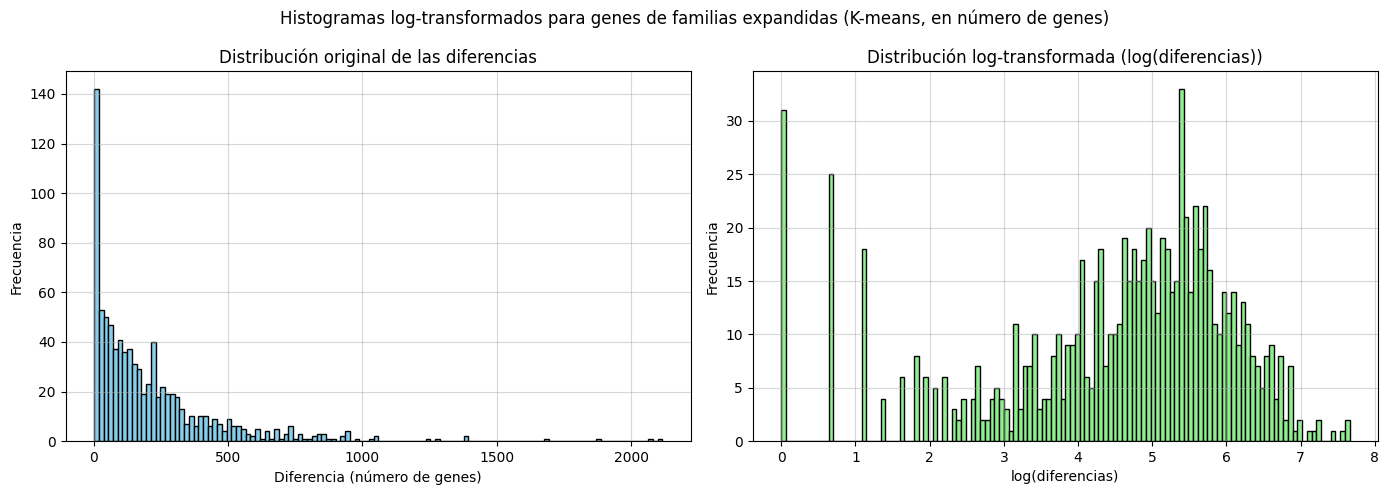

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear una lista con todas las diferencias
diferencias_k_means_num_genes = [d for diferencias_genoma in resultados_diferencias_num_genes_k_means.values() for d in diferencias_genoma]

# 2. Convertir a array de NumPy
diferencias_k_means_num_genes = np.array(diferencias_k_means_num_genes)

# 3. Filtrar solo valores positivos
diferencias_k_means_num_genes = diferencias_k_means_num_genes[diferencias_k_means_num_genes > 0]

# 4. Aplicar logaritmo
log_diferencias_k_means_num_genes = np.log(diferencias_k_means_num_genes)

# 5. Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.suptitle('Histogramas log-transformados para genes de familias expandidas (K-means, en número de genes)')
# Histograma original
axes[0].hist(diferencias_k_means_num_genes, bins=120, color='skyblue', edgecolor='black')
axes[0].set_title("Distribución original de las diferencias")
axes[0].set_xlabel("Diferencia (número de genes)")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True, alpha=0.5)

# Histograma log-transformado
axes[1].hist(log_diferencias_k_means_num_genes, bins=120, color='lightgreen', edgecolor='black')
axes[1].set_title("Distribución log-transformada (log(diferencias))")
axes[1].set_xlabel("log(diferencias)")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.savefig("resultados/histogramas_log_k_means_num_genes.png", dpi=200)
plt.show()



/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/opt/tljh/user/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Distribuciones con KS p-valor > 0.05:

Distribución: johnsonsu
  KS p-valor: 0.1878
  KS D: 0.0370
  AIC: 3121.14

Distribución: loggamma
  KS p-valor: 0.1460
  KS D: 0.0389
  AIC: 3118.90


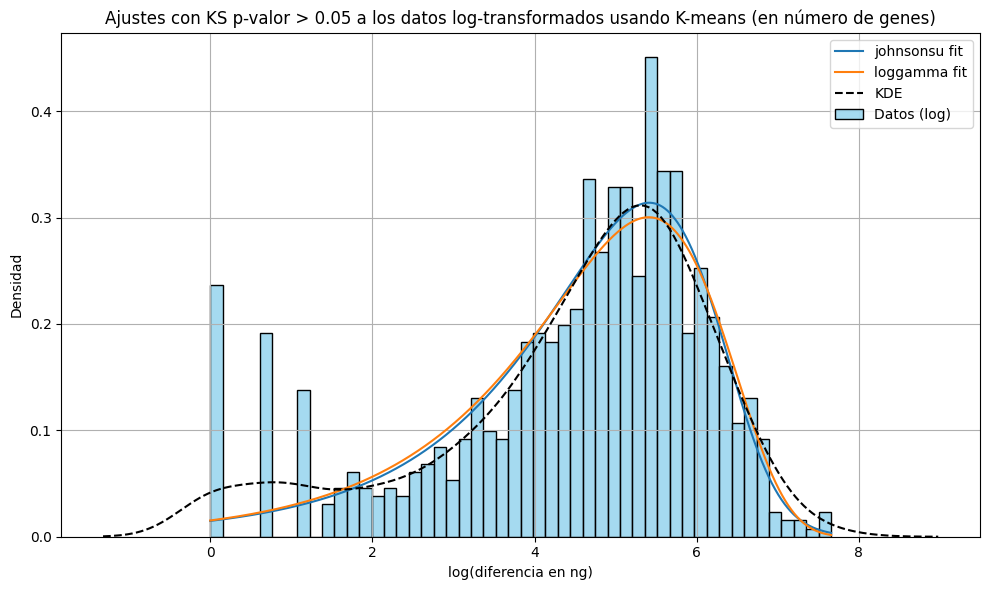

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Suponiendo que ya tienes esta variable definida
log_diffs_k_means_num_genes = np.log(diferencias_k_means_num_genes)

# Lista de distribuciones a probar
distribuciones = {
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'norm': stats.norm,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Almacenar resultados
resultados_k_means_num_genes = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(log_diffs_k_means_num_genes)
        log_likelihood = np.sum(dist.logpdf(log_diffs_k_means_num_genes, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(log_diffs_k_means_num_genes, dist.name, args=params)

        resultados_k_means_num_genes[nombre] = {
            'params': params,
            'AIC': AIC,
            'KS D': D,
            'KS p-value': p_ks
        }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Mostrar solo resultados con p-valor > 0.05
print("Distribuciones con KS p-valor > 0.05:")
distribuciones_validas = {
    nombre: res for nombre, res in resultados_k_means_num_genes.items() if res['KS p-value'] > 0.05
}

for nombre in sorted(distribuciones_validas, key=lambda x: distribuciones_validas[x]['KS p-value'], reverse=True):
    res = distribuciones_validas[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  AIC: {res['AIC']:.2f}")

# Graficar solo distribuciones válidas (p > 0.05)
plt.figure(figsize=(10, 6))
sns.histplot(log_diffs_k_means_num_genes, bins=50, kde=False, stat='density',
             color='skyblue', label='Datos (log)', edgecolor='black')

x_vals = np.linspace(min(log_diffs_k_means_num_genes), max(log_diffs_k_means_num_genes), 1000)

for nombre in sorted(distribuciones_validas, key=lambda x: distribuciones_validas[x]['KS p-value'], reverse=True):
    dist = distribuciones[nombre]
    params = distribuciones_validas[nombre]['params']
    plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

# KDE para comparación
sns.kdeplot(log_diffs_k_means_num_genes, color='black', linestyle='--', label='KDE')

plt.title("Ajustes con KS p-valor > 0.05 a los datos log-transformados usando K-means (en número de genes)")
plt.xlabel("log(diferencia en ng)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("resultados/ajustes_log_k_means_num_genes.png", dpi=300)
plt.show()


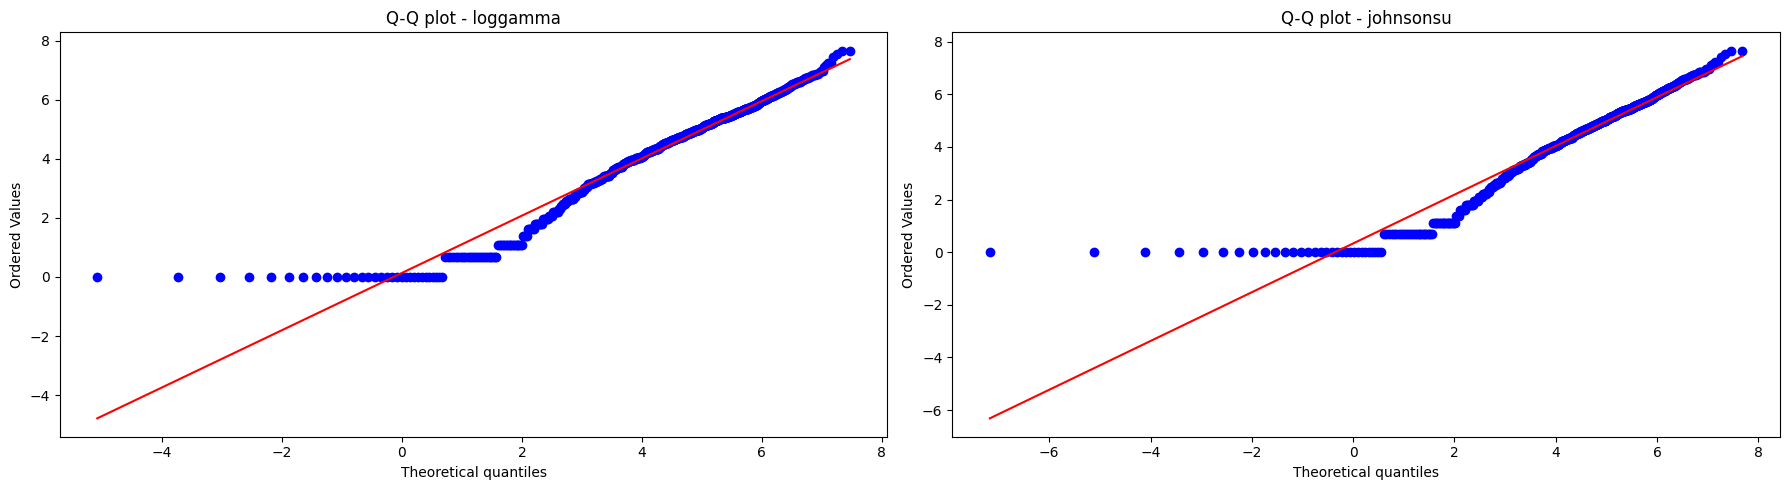

In [50]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustamos las distribuciones
params_loggamma = stats.loggamma.fit(log_diffs_k_means_num_genes)
params_johnsonsu = stats.johnsonsu.fit(log_diffs_k_means_num_genes)

# Crear Q-Q plots para ambas distribuciones
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# loggamma
stats.probplot(log_diffs_k_means_num_genes, dist=stats.loggamma, sparams=params_loggamma, plot=axes[0])
axes[0].set_title("Q-Q plot - loggamma")

# johnsonsu
stats.probplot(log_diffs_k_means_num_genes, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=axes[1])
axes[1].set_title("Q-Q plot - johnsonsu")

plt.tight_layout()
plt.show()


Párametros Johnson su: (2.1856992295239284, 1.7218209190150005, 6.932566691016665, 1.273530241666324)
AIC: 10755.466035850102
KS Statistic: 0.03701315483274782
KS p-value: 0.18779995174064557


/tmp/ipykernel_6594/2818825854.py:14: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_6594/2818825854.py:15: RuntimeWarning: invalid value encountered in divide
  return johnsonsu.pdf(y, *params) / x


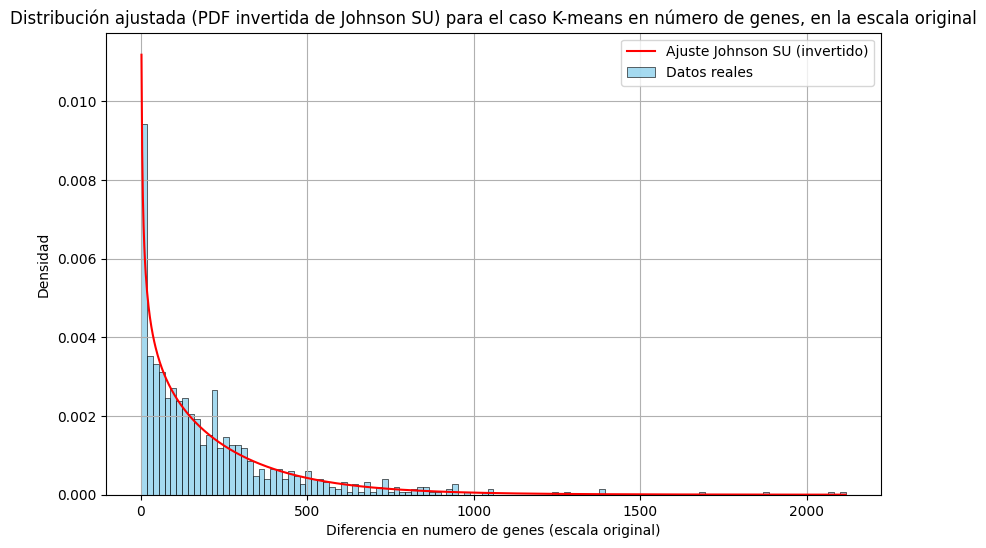

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import johnsonsu, kstest

# 1. Transformación de los datos (ya se supone que está hecho)
log_diffs_k_means_num_genes = np.log(diferencias_k_means_num_genes)  # Si aún no está definido

# 2. Ajuste de johnsonsu en escala logarítmica
params = johnsonsu.fit(log_diffs_k_means_num_genes)
print('Párametros Johnson su:', params)
# 3. PDF y CDF en escala original (invirtiendo log1p)
def pdf_original(x):
    y = np.log(x)
    return johnsonsu.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return johnsonsu.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias_k_means_num_genes))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias_k_means_num_genes, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias_k_means_num_genes), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_k_means_num_genes, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Johnson SU (invertido)')
plt.xlabel('Diferencia en numero de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Distribución ajustada (PDF invertida de Johnson SU) para el caso K-means en número de genes, en la escala original')
plt.legend()
plt.grid(True)
plt.savefig("resultados/ajuste_JS_inversa_log_k_means_num_genes.png", dpi=150)
plt.show()

Párametros loggamma: (0.58884973648848, 5.881998381601308, 0.8927957210779535)
AIC: 10753.228577361848
KS Statistic: 0.038945982879472506
KS p-value: 0.14600894279963317


/tmp/ipykernel_6594/1583156700.py:14: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_6594/1583156700.py:15: RuntimeWarning: invalid value encountered in divide
  return loggamma.pdf(y, *params) / x


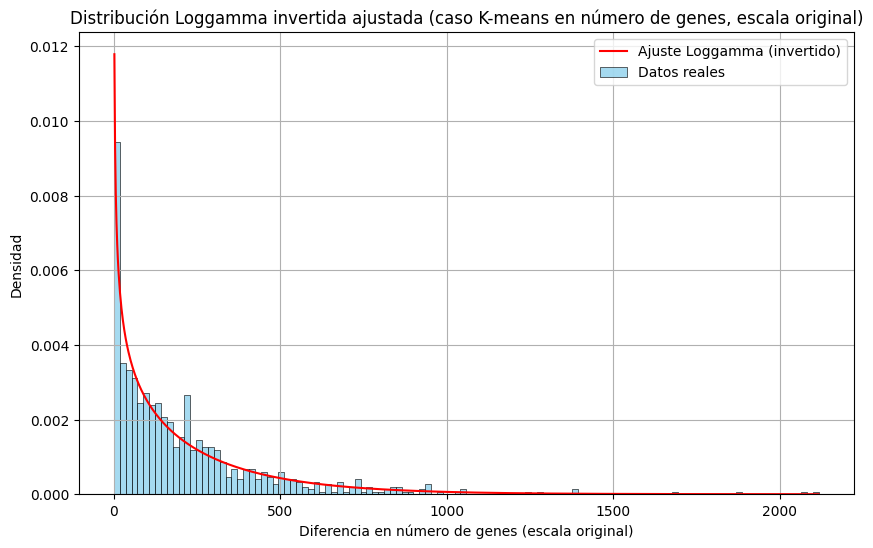

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loggamma, kstest

# 1. Transformación de los datos (ya se supone que está hecho)
log_diffs_k_means_num_genes = np.log(diferencias_k_means_num_genes)  # Si aún no está definido

# 2. Ajuste de loggamma en escala logarítmica
params = loggamma.fit(log_diffs_k_means_num_genes)
print('Párametros loggamma:', params)
# 3. PDF y CDF en escala original (invirtiendo log1p)
def pdf_original(x):
    y = np.log(x)
    return loggamma.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return loggamma.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias_k_means_num_genes))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias_k_means_num_genes, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias_k_means_num_genes), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_k_means_num_genes, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Loggamma (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Distribución Loggamma invertida ajustada (caso K-means en número de genes, escala original)')
plt.legend()
plt.grid(True)
plt.savefig("resultados/ajustes_log_k_means_num_genes_inversas_loggamma.png", dpi=150)
plt.show()


## umbrales en número de genes

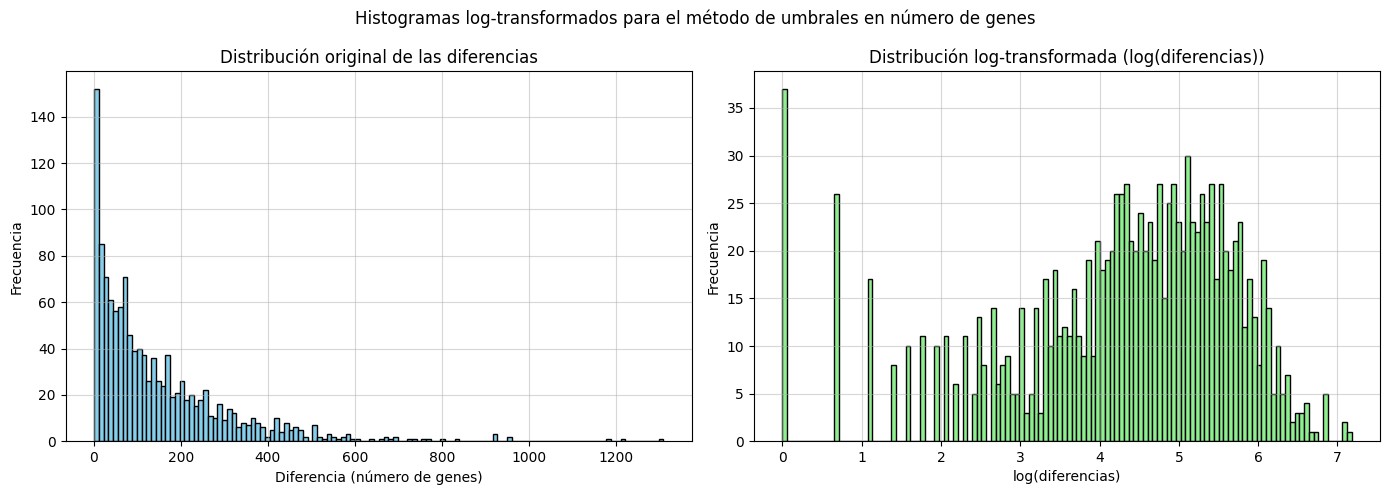

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear una lista con todas las diferencias
diferencias_umbrales_num_genes = [d for diferencias_genoma in resultados_diferencias_num_genes_umbrales.values() for d in diferencias_genoma]

# 2. Convertir a array de NumPy
diferencias_umbrales_num_genes = np.array(diferencias_umbrales_num_genes)

# 3. Filtrar solo valores positivos
diferencias_umbrales_num_genes = diferencias_umbrales_num_genes[diferencias_umbrales_num_genes > 0]

# 4. Aplicar logaritmo
log_diferencias_umbrales_num_genes = np.log(diferencias_umbrales_num_genes)

# 5. Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.suptitle("Histogramas log-transformados para el método de umbrales en número de genes")
# Histograma original
axes[0].hist(diferencias_umbrales_num_genes, bins=120, color='skyblue', edgecolor='black')
axes[0].set_title("Distribución original de las diferencias")
axes[0].set_xlabel("Diferencia (número de genes)")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True, alpha=0.5)

# Histograma log-transformado
axes[1].hist(log_diferencias_umbrales_num_genes, bins=120, color='lightgreen', edgecolor='black')
axes[1].set_title("Distribución log-transformada (log(diferencias))")
axes[1].set_xlabel("log(diferencias)")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.savefig("resultados/histogramas_log_k_umbrales.png", dpi=200)
plt.show()



/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Distribuciones con KS p-valor > 0.05:

Distribución: loggamma
  KS p-valor: 0.4873
  KS D: 0.0237
  AIC: 4160.46

Distribución: johnsonsu
  KS p-valor: 0.4528
  KS D: 0.0243
  AIC: 4162.93

Distribución: weibull
  KS p-valor: 0.3573
  KS D: 0.0263
  AIC: 4161.09

Distribución: beta
  KS p-valor: 0.1932
  KS D: 0.0307
  AIC: 4164.51


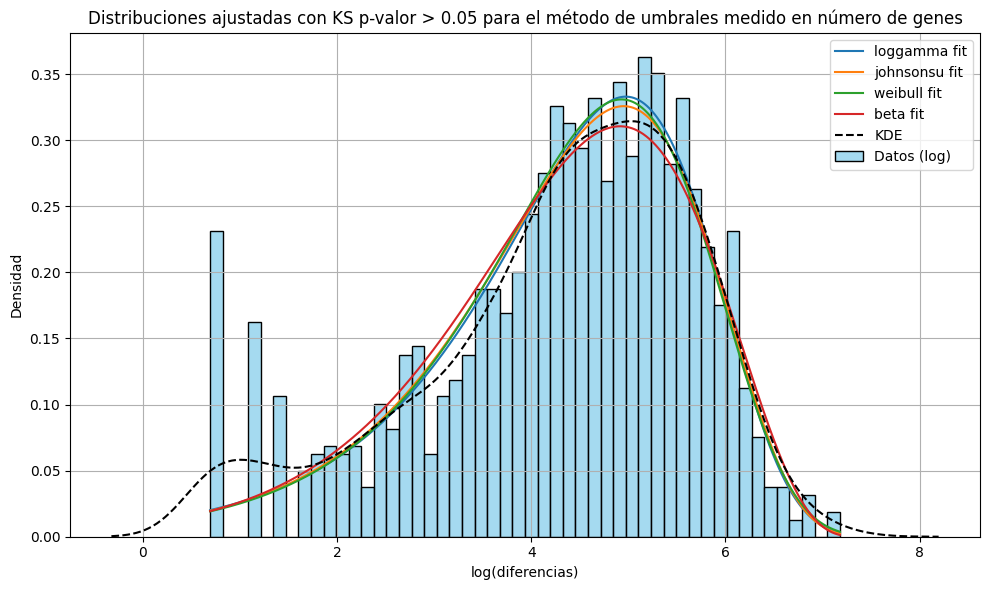

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Transformación logarítmica segura
log_diffs_umbrales_num_genes = np.log1p(diferencias_umbrales_num_genes)

# Lista de distribuciones
distribuciones = {
    'lognorm': stats.lognorm,
    'gamma': stats.gamma,
    'weibull': stats.weibull_min,
    'beta': stats.beta,
    'norm': stats.norm,
    'expon': stats.expon,
    'loggamma': stats.loggamma,
    'gengamma': stats.gengamma,
    'johnsonsu': stats.johnsonsu
}

# Almacenar resultados
resultados_umbrales_num_genes = {}

for nombre, dist in distribuciones.items():
    try:
        params = dist.fit(log_diffs_umbrales_num_genes)
        log_likelihood = np.sum(dist.logpdf(log_diffs_umbrales_num_genes, *params))
        k = len(params)
        AIC = 2 * k - 2 * log_likelihood
        D, p_ks = stats.kstest(log_diffs_umbrales_num_genes, dist.name, args=params)

        if p_ks > 0.05:  # Solo guardar si pasa el test de KS
            resultados_umbrales_num_genes[nombre] = {
                'params': params,
                'AIC': AIC,
                'KS D': D,
                'KS p-value': p_ks
            }
    except Exception as e:
        print(f"Error ajustando {nombre}: {e}")

# Mostrar resultados ordenados por KS p-value
print("Distribuciones con KS p-valor > 0.05:")
for nombre in sorted(resultados_umbrales_num_genes, key=lambda x: resultados_umbrales_num_genes[x]['KS p-value'], reverse=True):
    res = resultados_umbrales_num_genes[nombre]
    print(f"\nDistribución: {nombre}")
    print(f"  KS p-valor: {res['KS p-value']:.4f}")
    print(f"  KS D: {res['KS D']:.4f}")
    print(f"  AIC: {res['AIC']:.2f}")

# Graficar distribuciones válidas
if resultados_umbrales_num_genes:
    plt.figure(figsize=(10, 6))
    sns.histplot(log_diffs_umbrales_num_genes, bins=50, kde=False, stat='density',
                 color='skyblue', label='Datos (log)', edgecolor='black')

    x_vals = np.linspace(min(log_diffs_umbrales_num_genes), max(log_diffs_umbrales_num_genes), 1000)

    for nombre in sorted(resultados_umbrales_num_genes, key=lambda x: resultados_umbrales_num_genes[x]['KS p-value'], reverse=True):
        dist = distribuciones[nombre]
        params = resultados_umbrales_num_genes[nombre]['params']
        plt.plot(x_vals, dist.pdf(x_vals, *params), label=f'{nombre} fit')

    sns.kdeplot(log_diffs_umbrales_num_genes, color='black', linestyle='--', label='KDE')
    plt.title("Distribuciones ajustadas con KS p-valor > 0.05 para el método de umbrales medido en número de genes")
    plt.xlabel("log(diferencias)")
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('resultados/ajustes_log_umbrales_num_genes.png',dpi = 150)
    plt.show()
else:
    print("\nNinguna distribución pasó el umbral de KS p-valor > 0.05.")


/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


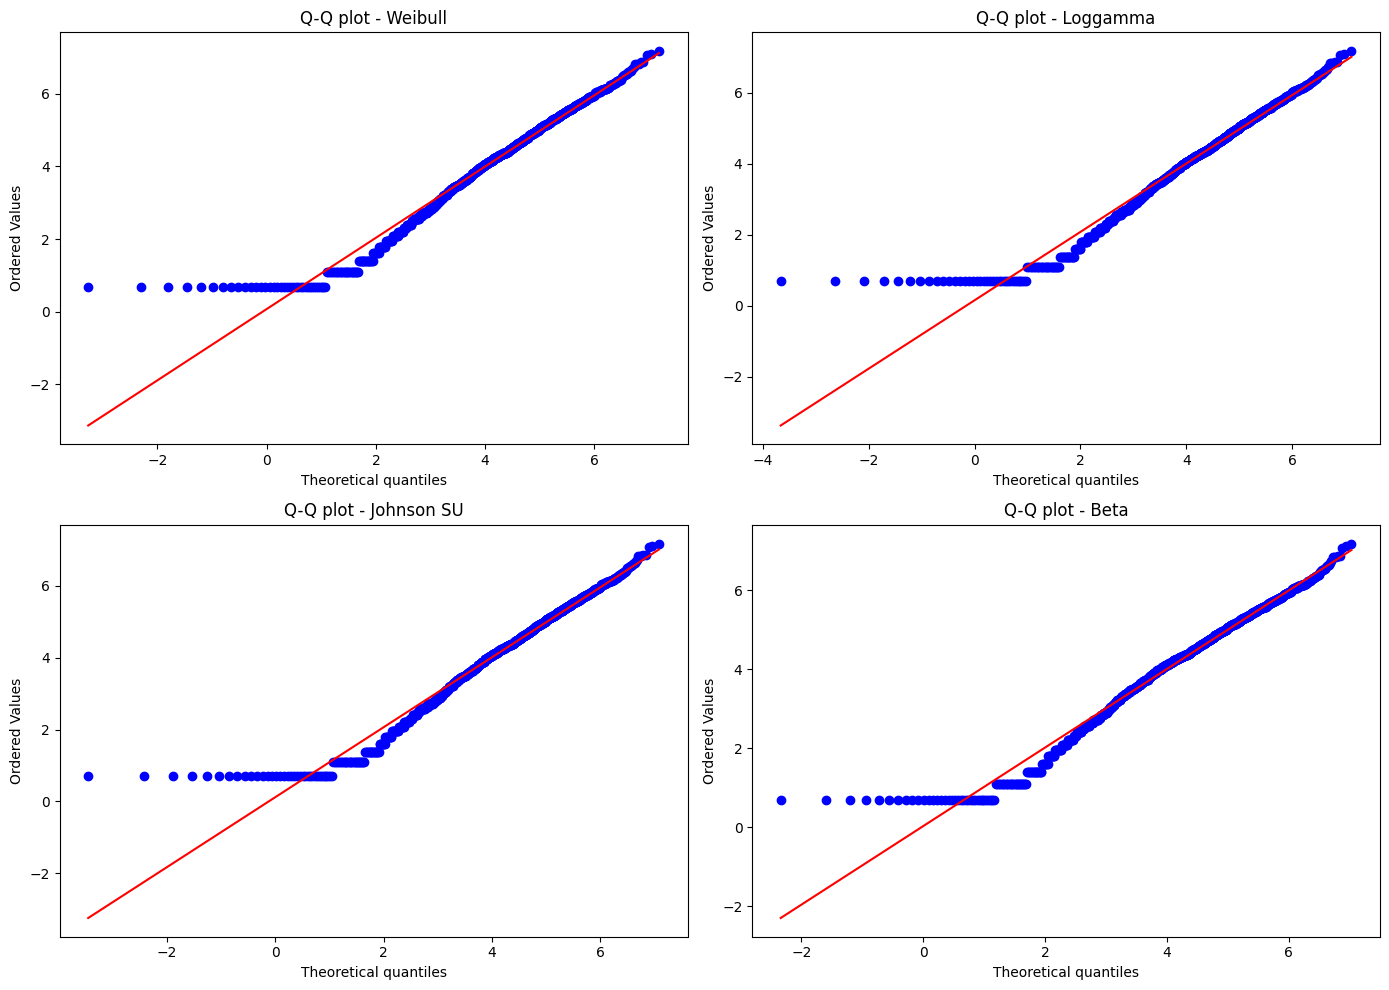

In [65]:
import matplotlib.pyplot as plt
from scipy import stats

# Ajustamos las distribuciones
params_weibull = stats.weibull_min.fit(log_diffs_umbrales_num_genes)
params_loggamma = stats.loggamma.fit(log_diffs_umbrales_num_genes)
params_johnsonsu = stats.johnsonsu.fit(log_diffs_umbrales_num_genes)
params_beta = stats.beta.fit(log_diffs_umbrales_num_genes)

# Crear Q-Q plots para las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Weibull
stats.probplot(log_diffs_umbrales_num_genes, dist=stats.weibull_min, sparams=params_weibull, plot=axes[0, 0])
axes[0, 0].set_title("Q-Q plot - Weibull")

# Loggamma
stats.probplot(log_diffs_umbrales_num_genes, dist=stats.loggamma, sparams=params_loggamma, plot=axes[0, 1])
axes[0, 1].set_title("Q-Q plot - Loggamma")

# Johnson SU
stats.probplot(log_diffs_umbrales_num_genes, dist=stats.johnsonsu, sparams=params_johnsonsu, plot=axes[1, 0])
axes[1, 0].set_title("Q-Q plot - Johnson SU")

# Beta
stats.probplot(log_diffs_umbrales_num_genes, dist=stats.beta, sparams=params_beta, plot=axes[1, 1])
axes[1, 1].set_title("Q-Q plot - Beta")

plt.tight_layout()
plt.show()


Párametros Johnson su: (3.1746470282369375, 2.1335982622394907, 7.087481269362766, 1.2176875139112666)
AIC: 14696.073408176817
KS Statistic: 0.02264256881695563
KS p-value: 0.5450400467467629


/tmp/ipykernel_6594/2074573834.py:14: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/tmp/ipykernel_6594/2074573834.py:15: RuntimeWarning: invalid value encountered in divide
  return johnsonsu.pdf(y, *params) / x


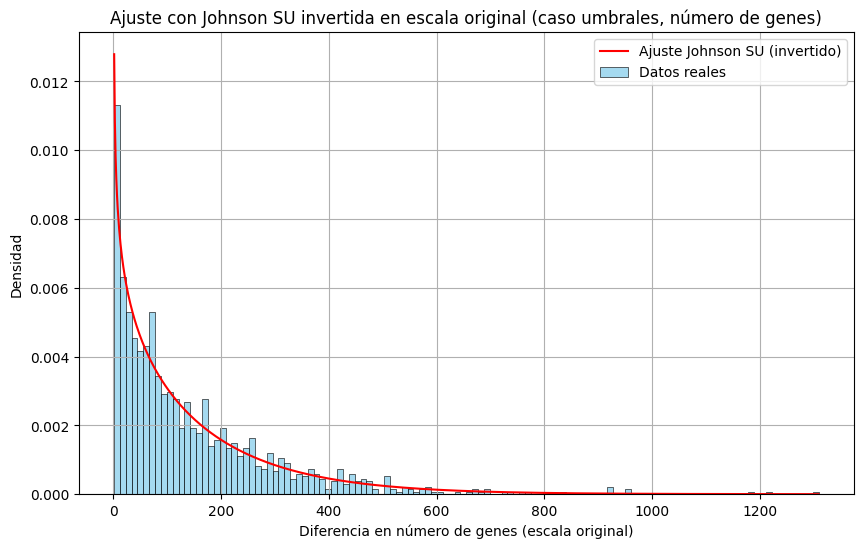

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import johnsonsu, kstest

# 1. Transformación de los datos (si aún no está hecho)
log_diffs_umbrales_num_genes = np.log(diferencias_umbrales_num_genes)

# 2. Ajuste de johnsonsu en escala logarítmica
params = johnsonsu.fit(log_diffs_umbrales_num_genes)
print('Párametros Johnson su:', params)
# 3. PDF y CDF en escala original (invirtiendo log(x)
def pdf_original(x):
    y = np.log(x)
    return johnsonsu.pdf(y, *params) / x

def cdf_original(x):
    y = np.log(x)
    return johnsonsu.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias_umbrales_num_genes))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias_umbrales_num_genes, cdf_original)

# 6. Resultados
print(f"AIC: {aic}")
print(f"KS Statistic: {ks_stat}")
print(f"KS p-value: {ks_p_value}")

# 7. Gráfico
x_vals = np.linspace(0, np.max(diferencias_umbrales_num_genes), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_umbrales_num_genes, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Johnson SU (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Ajuste con Johnson SU invertida en escala original (caso umbrales, número de genes)')
plt.legend()
plt.grid(True)
plt.savefig('resultados/ajuste_inversa_JS_umbrales_num_genes.png',dpi=150)
plt.show()


Párametros loggamma: (0.688712613129651, 5.3671048262963215, 0.9038446807986593)
AIC: 14691.69
KS Statistic: 0.0224
KS p-value: 0.5575


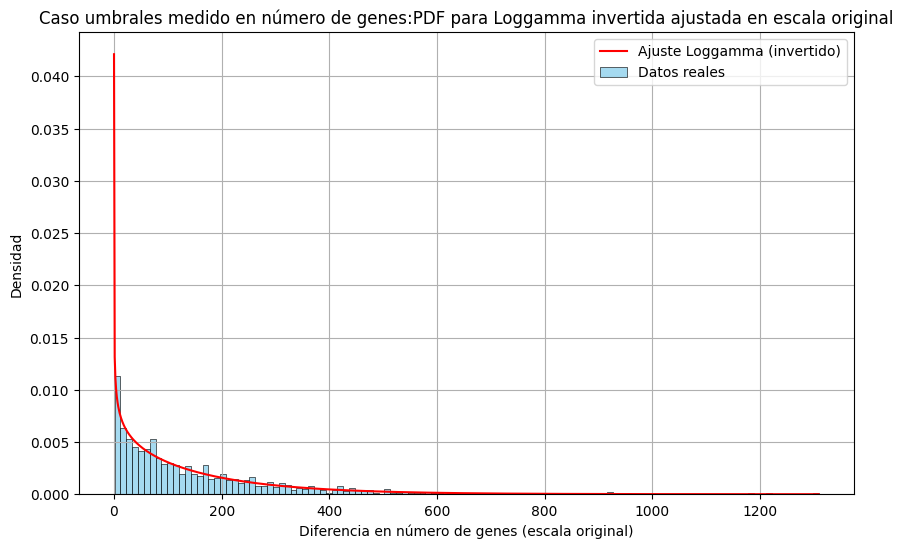

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loggamma, kstest

# 1. Transformación de los datos (si aún no está hecho)
log_diffs_umbrales_num_genes = np.log(diferencias_umbrales_num_genes)

# 2. Ajuste de loggamma en escala logarítmica
params = loggamma.fit(log_diffs_umbrales_num_genes)
print('Párametros loggamma:', params)
# 3. PDF y CDF en escala original (invirtiendo log(x))
def pdf_original(x):
    y = np.log(x)
    return loggamma.pdf(y, *params) / x  # Ajuste por cambio de variable

def cdf_original(x):
    y = np.log(x)
    return loggamma.cdf(y, *params)

# 4. AIC en escala original
log_probs = np.log(pdf_original(diferencias_umbrales_num_genes))
log_likelihood = np.sum(log_probs)
k = len(params)
aic = 2 * k - 2 * log_likelihood

# 5. Prueba KS en escala original
ks_stat, ks_p_value = kstest(diferencias_umbrales_num_genes, cdf_original)

# 6. Resultados
print(f"AIC: {aic:.2f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"KS p-value: {ks_p_value:.4f}")

# 7. Gráfico
x_vals = np.linspace(0.01, np.max(diferencias_umbrales_num_genes), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(diferencias_umbrales_num_genes, bins=120, stat='density', color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x_vals, pdf_original(x_vals), color='red', label='Ajuste Loggamma (invertido)')
plt.xlabel('Diferencia en número de genes (escala original)')
plt.ylabel('Densidad')
plt.title('Caso umbrales medido en número de genes:PDF para Loggamma invertida ajustada en escala original')
plt.legend()
plt.grid(True)
plt.savefig('resultados/ajuste_inversa_loggamma_umbrales_num_genes.png',dpi=150)
plt.show()

In [134]:
%autosave 30

Autosaving every 30 seconds
